# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

# Initial Dataframe visualization and EDA generation

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib as plt
import phik
import seaborn as sns

In [2]:
df = pd.read_csv('data\churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [3]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [5]:
report = ProfileReport(df)
report.to_file('churn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Critical information from EDA first glance

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


In [7]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [8]:
df.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

Below are charts that I wanted to see based on the original EDA.html

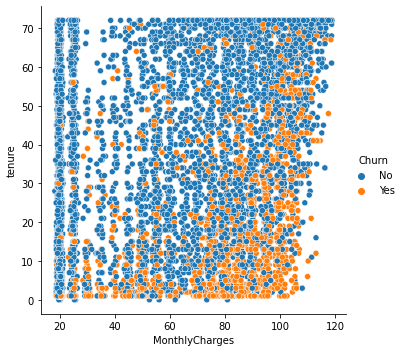

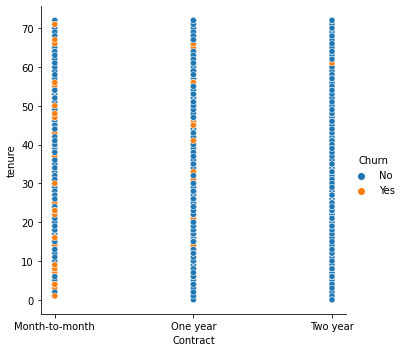

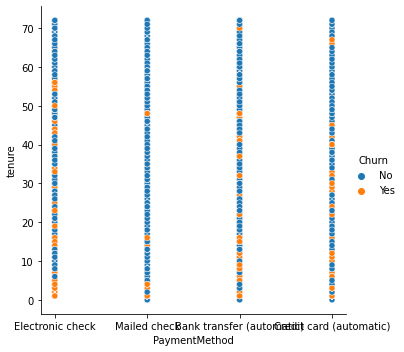

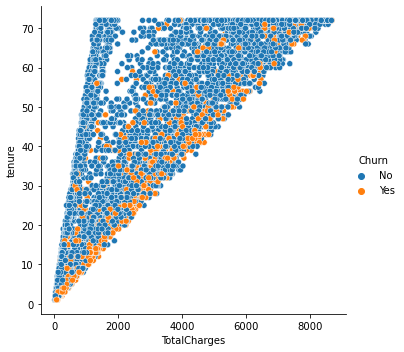

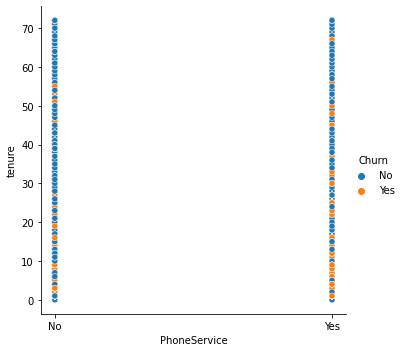

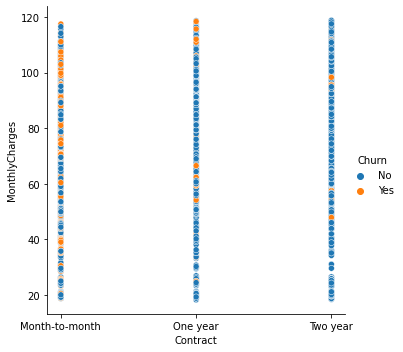

In [9]:
%matplotlib inline
sns.relplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn')
sns.relplot(data=df, x='Contract', y='tenure', hue='Churn')
sns.relplot(data=df, x='PaymentMethod', y='tenure', hue='Churn')
sns.relplot(data=df, x='TotalCharges', y='tenure', hue='Churn')
sns.relplot(data=df, x='PhoneService', y='tenure', hue='Churn')
sns.relplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Frequency'>

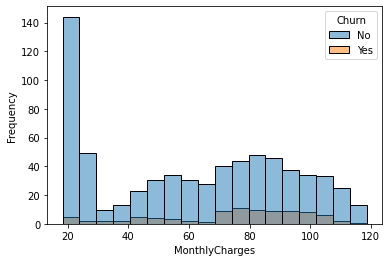

In [10]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='PaymentMethod', ylabel='Frequency'>

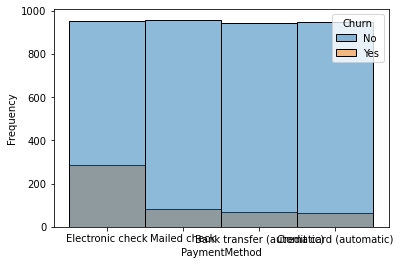

In [11]:
sns.histplot(data=df, x='PaymentMethod', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='TotalCharges', ylabel='Frequency'>

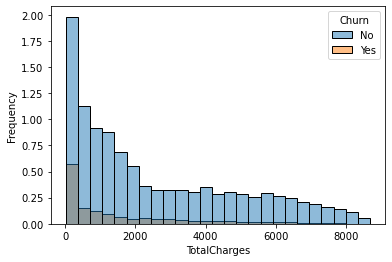

In [12]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='PhoneService', ylabel='Frequency'>

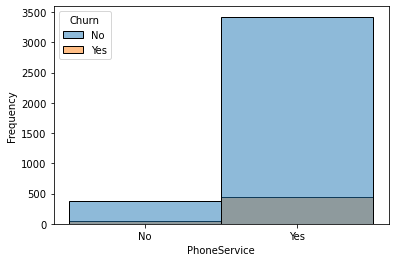

In [13]:
sns.histplot(data=df, x='PhoneService', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='tenure', ylabel='Frequency'>

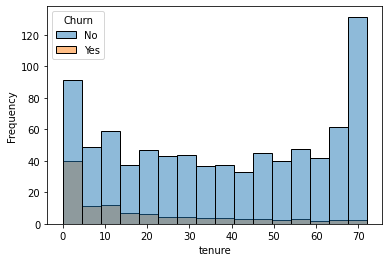

In [14]:
sns.histplot(data=df, x='tenure', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Frequency'>

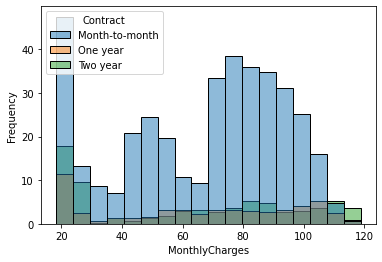

In [15]:
sns.histplot(data=df, x='MonthlyCharges', hue='Contract', stat='frequency')

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

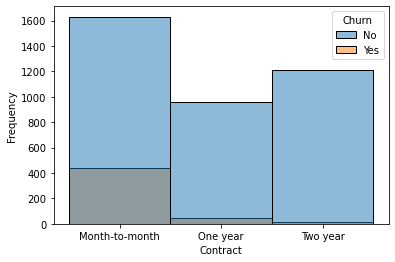

In [16]:
sns.histplot(data=df, x='Contract', hue='Churn', stat='frequency')
df['Contract'].value_counts() / df.shape[0]

Most customer contracts are month-to-month vs long-term contracts.

In [17]:
MTM_df = df[df['Contract'] == 'Month-to-month']
TwoYear_df = df[df['Contract'] == 'Two year']
OneYear_df = df[df['Contract'] == 'One year']

In [18]:
MTM_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,3875.000000,3875.000000,3875.000000
mean,18.036645,66.398490,1369.254581
std,17.689054,26.926599,1613.879008
min,1.000000,18.750000,18.850000
25%,3.000000,45.850000,160.100000
50%,12.000000,73.250000,679.550000
75%,29.000000,88.875000,2066.500000
max,72.000000,117.450000,8061.500000


In [19]:
TwoYear_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,1695.000000,1695.000000,1685.000000
mean,56.735103,60.770413,3728.933947
std,18.209363,34.678865,2571.252806
min,0.000000,18.400000,20.350000
25%,48.000000,24.025000,1278.800000
50%,64.000000,64.350000,3623.950000
75%,71.000000,90.450000,5999.850000
max,72.000000,118.750000,8672.450000


In [20]:
OneYear_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,1473.000000,1473.000000,1472.000000
mean,42.044807,65.048608,3034.683084
std,19.035883,31.840539,2229.730075
min,0.000000,18.250000,18.800000
25%,27.000000,26.900000,989.350000
50%,44.000000,68.750000,2657.550000
75%,58.000000,94.800000,4859.525000
max,72.000000,118.600000,8684.800000


No     0.572903
Yes    0.427097
Name: Churn, dtype: float64

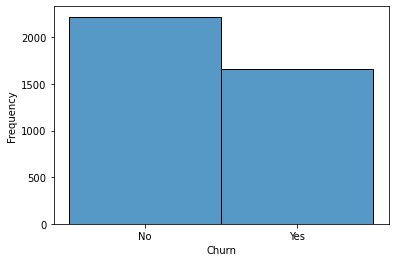

In [21]:
sns.histplot(data=MTM_df, x='Churn', stat='frequency')
MTM_df['Churn'].value_counts() / MTM_df.shape[0]

No     0.971681
Yes    0.028319
Name: Churn, dtype: float64

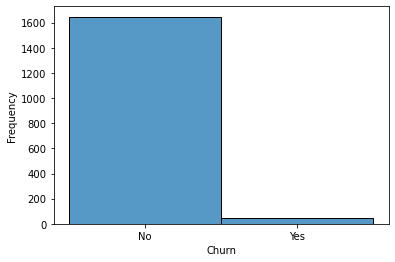

In [22]:
sns.histplot(data=TwoYear_df, x='Churn', stat='frequency')
TwoYear_df['Churn'].value_counts() / TwoYear_df.shape[0]

No     0.887305
Yes    0.112695
Name: Churn, dtype: float64

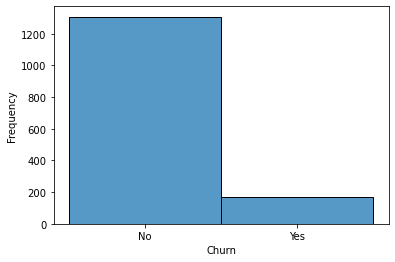

In [23]:
sns.histplot(data=OneYear_df, x='Churn', stat='frequency')
OneYear_df['Churn'].value_counts() / OneYear_df.shape[0]

About 15% of customers in month-to-month contracts keep their account open rather than closing them. What incentivizes customers to stay with the company when chosing the month-to-month plan?

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Frequency'>

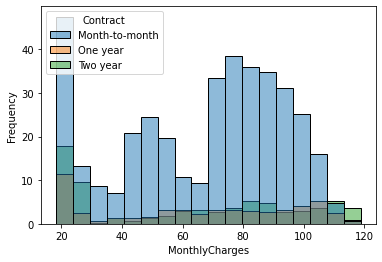

In [24]:
sns.histplot(data=df, x='MonthlyCharges', hue='Contract', stat='frequency')

Overall customers in month to month contracts are charged more monthly than customers with long-term contracts. More on this below.

<AxesSubplot:xlabel='Contract', ylabel='Frequency'>

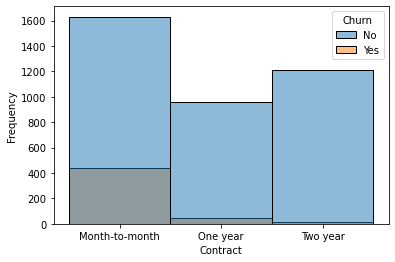

In [25]:
sns.histplot(data=df, x='Contract', hue='Churn', stat='frequency')

In [26]:
churn_df = df[df['Churn'] == 'Yes']
churn_df['Contract'].value_counts() / churn_df.shape[0]

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Contract, dtype: float64

In [27]:
NoChurn_df = df[df['Churn'] == 'No']
NoChurn_df['Contract'].value_counts() / NoChurn_df.shape[0]

Month-to-month    0.429068
Two year          0.318322
One year          0.252609
Name: Contract, dtype: float64

I am seeing a trend that 88.5% of customers who have closed their accounts have Month-to-month contracts. While the greatest amount of contracts of customers that have not closed their accounts are also month-to-month, the distribution of contract customers is more evenly distributed. I am now looking for a threshold trigger (monthlycharges and/or totalcharges) that causes them to close the account. 

<AxesSubplot:xlabel='Frequency', ylabel='MonthlyCharges'>

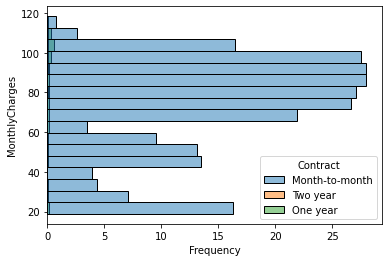

In [28]:
sns.histplot(data=churn_df, y='MonthlyCharges', hue='Contract', stat='frequency')

Customers with higher monthlycharges (70-100 dollars) for month-to-month contracts were the largest group of customers to have closed accounts. Furthermore, customers who have closed their accounts paid more per month with their month-to-month contracts than customers with long-term contracts.

<AxesSubplot:xlabel='Frequency', ylabel='MonthlyCharges'>

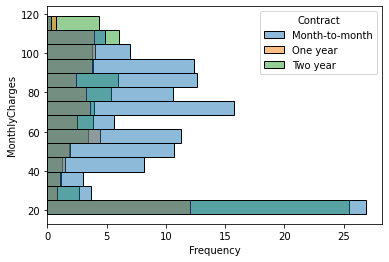

In [29]:
sns.histplot(data=NoChurn_df, y='MonthlyCharges', hue='Contract', stat='frequency')

Interestingly, the distribution of monthlycharges for all contracts are similar for non-closed accounts.

<AxesSubplot:xlabel='Frequency', ylabel='MonthlyCharges'>

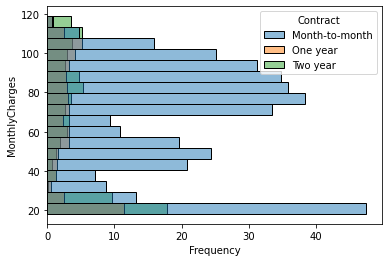

In [30]:
sns.histplot(data=df, y='MonthlyCharges', hue='Contract', stat='frequency')

The greatest number of customers with month to month contracts pay 
20 dollars per month, 
40 to 60 dollars per month,
or 70 to 100 dollars per month.

The greatest number of customers in long-term contracts pay 20 to 30 dollars per month.

It looks like customers with monthlycharges greater than 70 dollars tend to close their accounts more than any other customer. 

Some customers keep their accounts when they have monthly charges greater than 70 dollars when they have long-term contracts. This may be because they are stuck in their contract.

# Note to Self for later: 

I want to test the correlations between churns and monthly charges and how long they've been with the company. Brush up on Econometric and statistic formulas/concepts. Here are some additional EDAs that may help.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

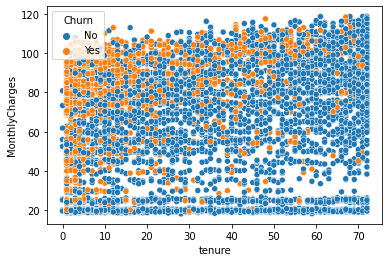

In [31]:
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

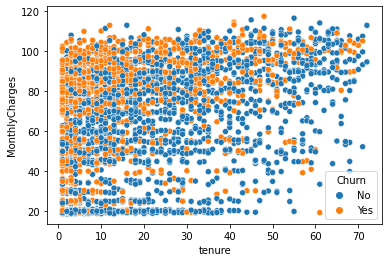

In [32]:
sns.scatterplot(data=MTM_df, x='tenure', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

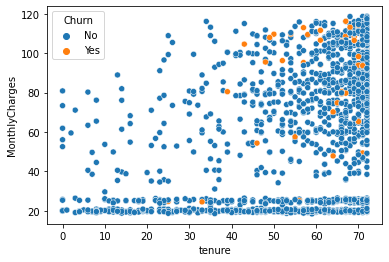

In [33]:
sns.scatterplot(data=TwoYear_df, x='tenure', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

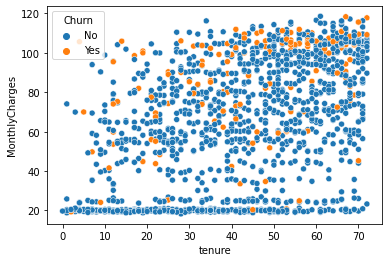

In [34]:
sns.scatterplot(data=OneYear_df, x='tenure', y='MonthlyCharges', hue='Churn')

<AxesSubplot:>

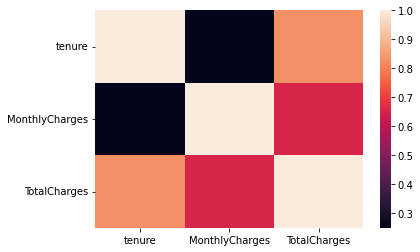

In [35]:
sns.heatmap(df.corr())

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


<AxesSubplot:>

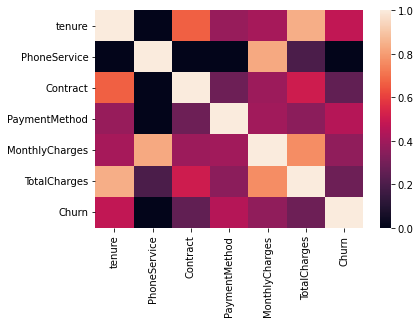

In [36]:
sns.heatmap(df.phik_matrix())

In [37]:
nochurn_report = ProfileReport(NoChurn_df)
nochurn_report.to_file('nochurn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
nochurn_MTM_df = df[(df['Churn'] == 'No') & (df['Contract'] == 'Month-to-month')]
nochurnMTM_report = ProfileReport(nochurn_MTM_df)
nochurnMTM_report.to_file('noMTMchurn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
churn_report = ProfileReport(churn_df)
churn_report.to_file('onlychurn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
churn_MTM_df = df[(df['Churn'] == 'Yes') & (df['Contract'] == 'Month-to-month')]
churnMTM_report = ProfileReport(churn_MTM_df)
churnMTM_report.to_file('onlyMTMchurn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]